In [7]:
from mlflow.tracking import MlflowClient
from mlflow.entities import ViewType
from mlflow import list_run_infos
from urllib.parse import urlparse, unquote_plus
import pandas as pd
import seaborn as sn

In [8]:
# Get experiment
# NOTE: Make sure your CWD is set to the directory where your mlruns/ folder is located.

# import os
# print(os.getcwd()) # Shows the CWD
# os.chdir(NEW_PATH) # Sets the CWD to an arbitrary path.

client = MlflowClient()
experiment = client.get_experiment_by_name("DQN_test_April9")

In [9]:
exp_id = experiment.experiment_id
runs = list_run_infos(exp_id)
runs = sorted(runs, key=lambda r: r.end_time)
latest_run = runs[-1]
artifact_uri = unquote_plus(urlparse(str(latest_run.artifact_uri)).path)
progress_path = artifact_uri + "/progress.csv"
progress = pd.read_csv(progress_path)
progress

,episode_reward_max,episode_reward_min,episode_reward_mean,episode_len_mean,episodes_this_iter,num_healthy_workers,timesteps_total,done,episodes_total,training_iteration,...,info/learner/policy_0/min_q,info/learner/policy_0/max_q,info/learner/policy_0/mean_td_error,info/learner/policy_1/allreduce_latency,info/learner/policy_1/grad_gnorm,info/learner/policy_1/cur_lr,info/learner/policy_1/mean_q,info/learner/policy_1/min_q,info/learner/policy_1/max_q,info/learner/policy_1/mean_td_error
0,55.528982,53.429325,54.078498,100.0,10,0,1000,False,10,1,...,-0.233605,0.109005,-0.338004,0.0,0.414755,0.15,-0.014961,-0.178062,0.082990,-0.262445
1,55.528982,51.642108,54.019691,100.0,10,0,2000,False,20,2,...,10.567066,14.977252,1.020931,0.0,6.583196,0.15,41.149101,40.009853,43.319763,-0.515809
2,55.528982,51.642108,54.110642,100.0,10,0,3000,False,30,3,...,10.752666,10.936105,0.063754,0.0,14.749950,0.15,42.210255,40.951263,42.922436,1.774853
3,55.610982,51.642108,54.022742,100.0,10,0,4000,True,40,4,...,10.240251,10.405115,0.047765,0.0,12.380273,0.15,39.649010,38.057289,40.478428,-3.277897


<AxesSubplot:xlabel='episodes_total', ylabel='episode_reward_mean'>

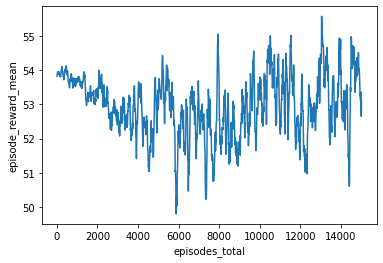

In [4]:
sn.lineplot(data=progress, x="episodes_total",y="episode_reward_mean")

In [ ]:
#Step 4: Evaluation

training_config["evaluation_config"] = {"explore": False}
trained_trainer = DQNTrainer(config=training_config)
trained_trainer.restore(best_checkpoint)
price_agent0_list = []
reward_agent0_list = []
price_agent1_list = []
reward_agent1_list = []
obs, reward, done, info = env.step({"agent_0": 1, "agent_1": 11})
for i in range(500):

    action_agent0 = trained_trainer.compute_action(obs["agent_0"], policy_id="policy_0")
    action_agent1 = trained_trainer.compute_action(obs["agent_1"], policy_id="policy_1")
    obs, reward, done, info = env.step(
        {"agent_0": action_agent0, "agent_1": action_agent1}
    )
    price_agent0_list.append(info["agent_0"])
    reward_agent0_list.append(reward["agent_0"])
    price_agent1_list.append(info["agent_1"])
    reward_agent1_list.append(reward["agent_1"])

plt.ion()

plt.plot(price_agent0_list)
plt.show()
plt.plot(price_agent1_list)
plt.show()

IRresults = {
    "Profits Agent 0": reward_agent0_list,
    "Profits Agent 1": reward_agent1_list,
    "Price Agent 0": price_agent0_list,
    "Price Agent 1": price_agent1_list,
}
df_IR = pd.DataFrame(IRresults)
df_IR.to_csv("collusion_IR_DQN.csv")